In [9]:
import scipy.sparse.csgraph as csg
import pprint
import pandas as pd
import numpy as np
from itertools import permutations
import cv2
import matplotlib.pyplot as plt

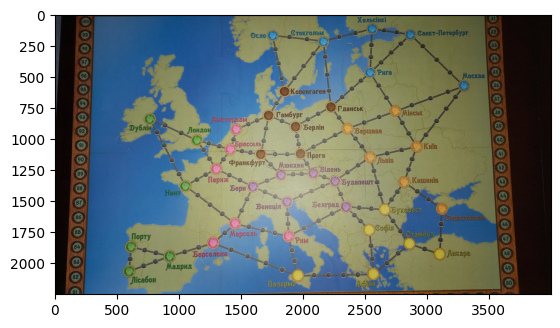

In [10]:
img = cv2.imread('images/mov_map.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

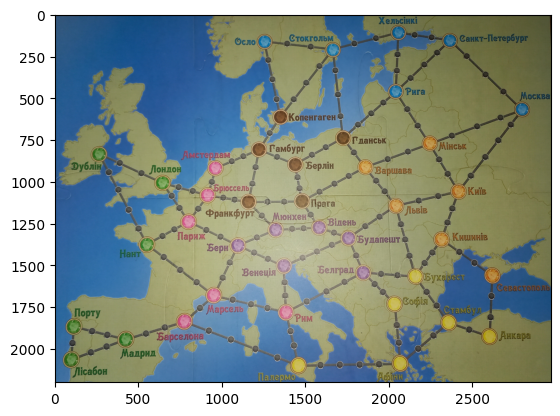

In [11]:
crop_img = img[:-50, 500:-530]
plt.imshow(crop_img)

In [13]:
img = crop_img
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('images/mov_map_crop.png', img)

True

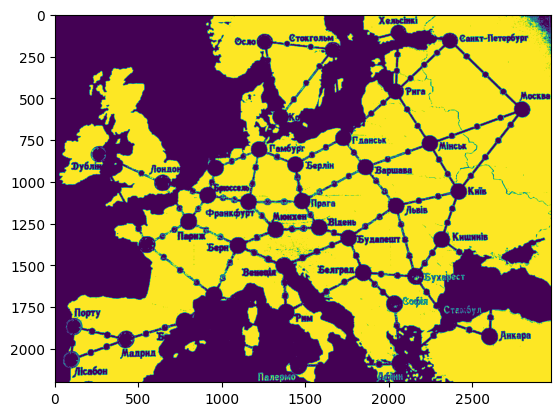

In [57]:
hsv_img = cv2.cvtColor(crop_img, cv2.COLOR_RGB2HSV)
cvt_value = np.array([180 / 360, 255 / 100, 255 / 100])
# on ColorPicker:
# H: 50-80
# S: 15-50
# V: 30-80
lower_bound = [50, 15, 35] * cvt_value
upper_bound = [80, 50, 80] * cvt_value
mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
plt.imshow(mask)

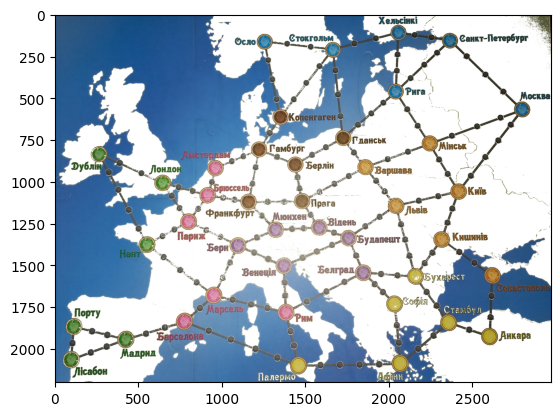

In [58]:
mask_img = crop_img.copy()
mask_img[np.where(mask != 0)] = 255
plt.imshow(mask_img)

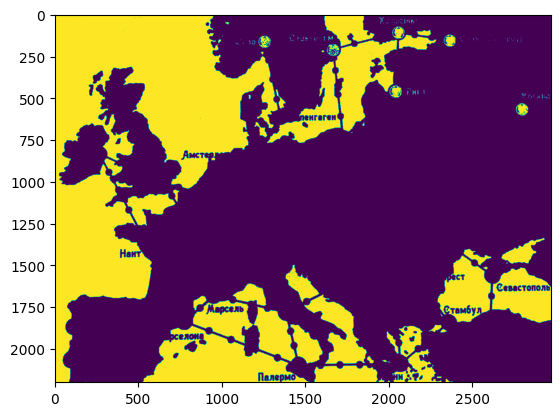

In [59]:
# on ColorPicker:
# H: 200-230
# S: 25-90
# V: 30-80
lower_bound = [200, 25, 30] * cvt_value
upper_bound = [230, 90, 80] * cvt_value
mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
plt.imshow(mask)

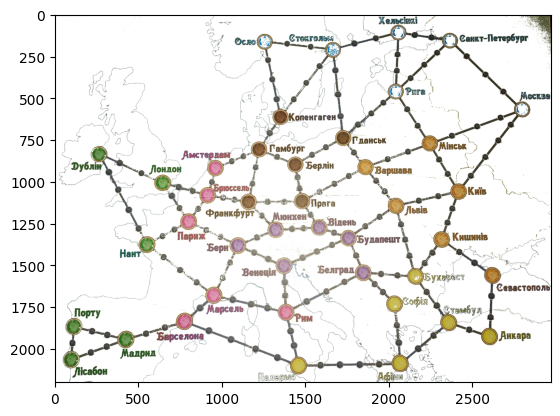

In [60]:
mask_img[np.where(mask != 0)] = 255
plt.imshow(mask_img)

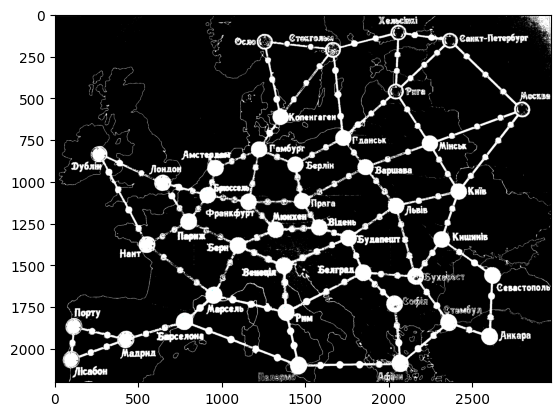

In [61]:
gray_img = mask_img.copy()
gray_img[np.where(gray_img < 255)] = 0
gray_img = cv2.bitwise_not(gray_img)
plt.imshow(gray_img)

In [49]:
print(gray_img[:5, :5])

[[82 69 68 74 75]
 [76 70 72 77 72]
 [68 68 64 59 54]
 [36 40 43 46 45]
 [30 29 28 28 32]]


In [69]:
# kernel = np.ones((2,2),np.uint8)
# eroded_img = cv2.erode(gray_img, kernel, iterations = 1)
# # eroded_img = cv2.morphologyEx(gray_img, cv2.MORPH_OPEN, kernel)
# plt.imshow(eroded_img)

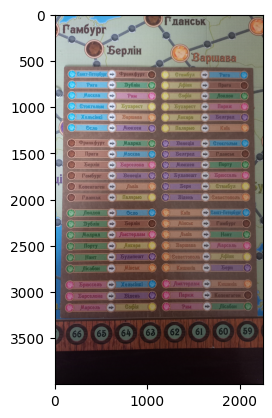

In [3]:
img = cv2.imread('images/transitions_map.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

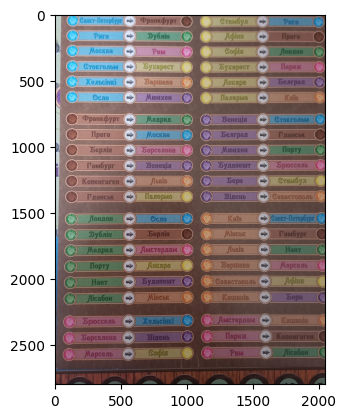

In [4]:
crop_img = img[600:3400, 50:2100]
plt.imshow(crop_img)

In [5]:
img = crop_img
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('images/trans_map_crop.png', img)

True

In [6]:
# %pip install google-cloud-vision